# 1.통계분석
- Carseats 데이터는 자동차 좌석 판매정보
    - 수치형 : Sales, CompPrice, Income, Advertising, Population, Price, Age, Education
    - 범주형 : ShelveLoc, Urban, US

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.unicode_minus'] = False

carseats = pd.read_csv('Carseats.csv')

### 1. 
- Urban 변수에 따른 Sales의 차이가 있는지, 통계적으로 검증하기 위한 통계분석 수행. 결과해석 (정규성 만족 가정)

In [9]:
urban_y = carseats[carseats.Urban=='Yes'].Sales
urban_n = carseats[carseats.Urban=='No'].Sales

In [10]:
from scipy.stats import ttest_ind

tstat, p = ttest_ind(urban_y, urban_n, equal_var=True, alternative='two-sided')
print('검정통계량 : {:.3f}, 유의확률 : {:3f}'.format(tstat, p))

# 귀무가설 : urban==Yes인 경우와 urban=False인 경우 평균의 차이는 없다.
# 대립가설 : urban==Yes인 경우와 urban=False인 경우 평균의 차이는 있다.

# 검정통계량은 -0.308이고 이 때, 유의확률은 0.75이므로 귀무가설을 기각할 수 없다. 즉 평균의 차이는 없다.

검정통계량 : -0.308, 유의확률 : 0.758507


### 2. 
- Sales 변수와 CompPrice, Income, Advertising, Population, Price, Age, Education 변수들 사이의 관계를 피어슨 상관계수를 이용한 상관관계 분석 수행 후 해석하시오.

<Axes: >

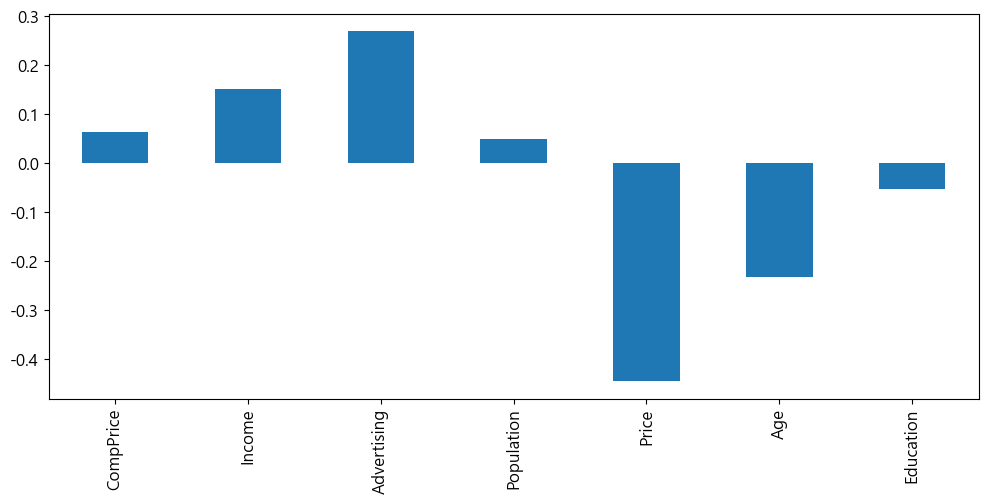

In [17]:
data2 = carseats[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']]
corr_table = data2.corr(method='pearson')
corr_table.Sales[1:].plot(kind='bar')

# Sales와 Price는 음의 상관관계를 가진다고 볼 수 있고,
# Age는 낮은 음의 상관관계, Advertizing은 낮은 양의 상관관계를 갖는다고 볼수 있다.

### 3. 
- 종속변수를 Sales, 독립변수를 CompPrice, Income, Advertising, Population, Price, Age, Education로 설정하고, 후진제거법을 활용하여 회귀분석을 실시하고, 추정된 회귀식을 작성하시오.

In [20]:
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import statsmodels.api as sm

def stepwise_method_AIC(X, y):
    result = pd.DataFrame()
    feature_combis=[]
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()

    for j, combi in enumerate(feature_combis):
        X_=X.filter(combi)
        X_=sm.add_constant(X_)
        model = sm.OLS(y, X_)
        fitted = model.fit()

        n = fitted.nobs
        p = fitted.df_model
        if j==0:
            MSE_full = fitted.mse_resid

        result.loc[j, 'feature_combi'] = ', '.join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic

        result = result.sort_values(by='AIC', ascending=True)
        best = result.iloc[0, 0]
    return best, result

y = carseats[['Sales']]
X = carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']]

stepwise_method_AIC(X, y)

('const, CompPrice, Income, Advertising, Price, Age',
                                          feature_combi          AIC
 25   const, CompPrice, Income, Advertising, Price, Age  1665.834569
 4    const, CompPrice, Income, Advertising, Price, ...  1666.680597
 7    const, CompPrice, Income, Advertising, Populat...  1667.829320
 0    const, CompPrice, Income, Advertising, Populat...  1668.647466
 50           const, CompPrice, Advertising, Price, Age  1678.074227
 ..                                                 ...          ...
 123                                  const, Population  1967.685393
 117                       const, CompPrice, Population  1967.762118
 114                        const, CompPrice, Education  1967.904785
 102                       const, Population, Education  1968.804134
 87             const, CompPrice, Population, Education  1968.835948
 
 [127 rows x 2 columns])

In [21]:
y = carseats[['Sales']]
X = carseats[['CompPrice', 'Income', 'Advertising', 'Price', 'Age']]

X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()

fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     92.62
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           2.70e-64
Time:                        23:50:25   Log-Likelihood:                -826.92
No. Observations:                 400   AIC:                             1666.
Df Residuals:                     394   BIC:                             1690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.1092      0.944      7.531      0.000       5.253       8.965
CompPrice       0.0939      0.008     12.051      0.000       0.079       0.109
Income          0.0131      0.003      3.779      0.000       0.006       0.020
Advertising     0.1306      0.015      8.963      0.000       0.102       0.159
Price          -0.0925      0.005    -18.347      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.503      0.000      -0.057      -0.033
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.154
Skew:                           0.288   Prob(JB):                       0.0170
Kurtosis:                       2.602   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""